In [ ]:
import __future__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
netflix = pd.read_csv('netflix_titles.csv')

In [ ]:

df = pd.DataFrame(pd.read_csv("netflix_titles.csv"))
netflix = netflix.drop_duplicates()
netflix.reset_index(drop=True, inplace=True)
print(netflix.head())
print(f"Original rows: {len(netflix)}")
print(f"Cleaned rows: {len(netflix)}")


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# 1.	What are the total number of:
# o	Movies
# o	TV Shows

type_counts = netflix['type'].value_counts()
print("Total count by content type:")
print(type_counts)


Total count by content type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
# 2.	Display the top 10 countries producing the most Netflix content.
countries = df["country"].str.split(', ').explode()
top10 = countries.value_counts().head(10)
print(top10)




country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [ ]:
# 3.	What is the most common rating assigned to the content (e.g., TV-MA, PG-13)?
most_common_rating = netflix['rating'].value_counts().idxmax()
top_ratings = netflix['rating'].value_counts().head()
print("Most common rating:", most_common_rating)
print("\nTop Ratings:\n", top_ratings)


Most common rating: TV-MA

Top Ratings:
 rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


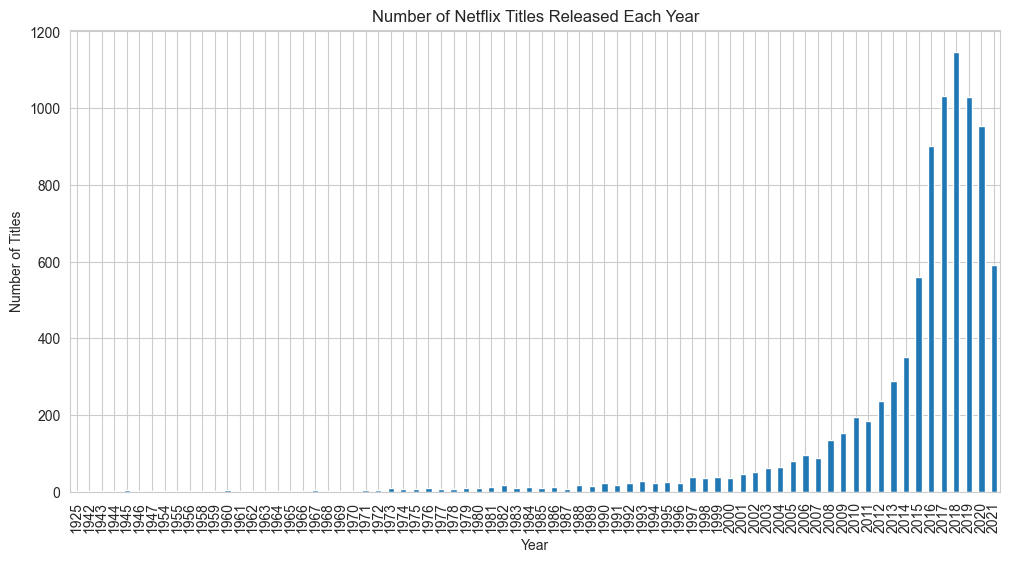

In [ ]:
# 4.	Find the number of titles released each year and plot it as a bar chart.
netflix = pd.read_csv('netflix_titles.csv')
titles_per_year = netflix['release_year'].value_counts().sort_index()
titles_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Netflix Titles Released Each Year')
plt.show()


In [ ]:
# 5.	How many entries have missing values in the director, cast, or country columns?
missing_count = netflix[['director', 'cast', 'country']].isnull().any(axis=1).sum()
print(f"Number of entries with missing values in director, cast, or country: {missing_count}")


Number of entries with missing values in director, cast, or country: 3471


In [ ]:
# 6.	Replace all missing country values with "Unknown". How many are now labeled as "Unknown"?
netflix['country'] = netflix['country'].fillna('Unknown')
unknown_count = (netflix['country'] == 'Unknown').sum()
print(f"Number of entries labeled as 'Unknown' in country column: {unknown_count}")


Number of entries labeled as 'Unknown' in country column: 831


In [ ]:
# 7.	For rows where director is missing, check if there’s still a cast available. Count them.
count = netflix[netflix['director'].isnull() & netflix['cast'].notnull()].shape[0]
print(f"Number of rows where director is missing but cast is available: {count}")


Number of rows where director is missing but cast is available: 2282


In [ ]:
# 8.	Extract the number of seasons or minutes from the duration column into separate columns (num_minutes or num_seasons).
netflix['num_minutes'] = np.nan
netflix['num_seasons'] = np.nan
netflix.loc[netflix['duration'].str.contains('min', na=False), 'num_minutes'] = (
    netflix['duration'].str.extract(r'(\d+)').astype(float)
)
netflix.loc[netflix['duration'].str.contains('Season', na=False), 'num_seasons'] = (
    netflix['duration'].str.extract(r'(\d+)').astype(float)
)
print(netflix[['duration', 'num_minutes', 'num_seasons']].head())

    duration  num_minutes  num_seasons
0     90 min          NaN          NaN
1  2 Seasons          NaN          NaN
2   1 Season          NaN          NaN
3   1 Season          NaN          NaN
4  2 Seasons          NaN          NaN


In [29]:
count = netflix[netflix['director'].isnull() & netflix['cast'].notnull()].shape[0]
print(f"Number of rows where director is missing but cast is available: {count}")


Number of rows where director is missing but cast is available: 2282


In [ ]:

netflix['num_minutes'] = np.nan
netflix['num_seasons'] = np.nan
netflix.loc[netflix['duration'].str.contains('min', na=False), 'num_minutes'] = (
    netflix['duration'].str.extract(r'(\d+)').astype(float)
)
netflix.loc[netflix['duration'].str.contains('Season', na=False), 'num_seasons'] = (
    netflix['duration'].str.extract(r'(\d+)').astype(float)
)
print(netflix[['duration', 'num_minutes', 'num_seasons']].head())



    duration  num_minutes  num_seasons
0     90 min          NaN          NaN
1  2 Seasons          NaN          NaN
2   1 Season          NaN          NaN
3   1 Season          NaN          NaN
4  2 Seasons          NaN          NaN


In [ ]:
movies = netflix[netflix['type'] == 'Movie'].copy()
movies['num_minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)
average_duration = movies['num_minutes'].mean()
print(f"Average duration of movies: {average_duration:.2f} minutes")




Average duration of movies: 99.58 minutes


In [42]:
tv_shows = netflix[netflix['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)
max_seasons_row = tv_shows.loc[tv_shows['num_seasons'].idxmax()]
print(f"TV Show with the highest number of seasons: {max_seasons_row['title']}")
print(f"Number of seasons: {int(max_seasons_row['num_seasons'])}")


TV Show with the highest number of seasons: Grey's Anatomy
Number of seasons: 17


In [ ]:
movies_2020_india = netflix[
    (netflix['type'] == 'Movie') &
    (netflix['release_year'] == 2020) &
    (netflix['country'].str.contains('India', na=False))
]
print("Movies released in 2020 from India:")
print(movies_2020_india['title'].tolist())


Movies released in 2020 from India:
['Shikara', 'Har Kisse Ke Hisse: Kaamyaab', 'Time to Dance', 'One', 'Uppena', 'Madam Chief Minister', 'Indoo Ki Jawani', 'Love', 'Kilometers and Kilometers', 'AK vs AK', 'Vir Das: Outside In - The Lockdown Special', 'Torbaaz', 'Andhakaaram', 'Fukrey Boyzzz: Space Mein Fukrapanti', 'Ludo', 'Miss India', 'Kaali Khuhi', 'The Trial of the Chicago 7', 'Rooting for Roona', 'Ginny Weds Sunny', 'Serious Men', 'Dolly Kitty Aur Woh Chamakte Sitare', 'Cargo', 'Maniyarayile Ashokan', "Class of '83", 'Gunjan Saxena: The Kargil Girl', 'Raat Akeli Hai', 'Uma Maheswara Ugra Roopasya', 'Door Ke Darshan', 'Krishna and His Leela', 'Bulbbul', 'Kappela', 'Chaman Bahaar', 'Asura Guru', 'Axone', 'Forensic', 'Choked: Paisa Bolta Hai', 'Chippa', 'Kenny Sebastian: The Most Interesting Person in the Room', 'What Are the Odds?', 'Malang', 'Mrs. Serial Killer', 'Psycho', 'Love Aaj Kal', 'The Lift Boy', 'Bheeshma', 'Yours Sincerely, Kanan Gill', 'Varane Avashyamund', 'World Famou

In [ ]:
tv_ma_shows = netflix[
    (netflix['type'] == 'TV Show') &
    (netflix['rating'] == 'TV-MA')
].copy()
tv_ma_shows['num_seasons'] = tv_ma_shows['duration'].str.extract(r'(\d+)').astype(float)
tv_ma_more_than_1 = tv_ma_shows[tv_ma_shows['num_seasons'] > 1]
print("TV-MA rated TV Shows with more than 1 season:")
print(tv_ma_more_than_1[['title', 'num_seasons']])


TV-MA rated TV Shows with more than 1 season:
                  title  num_seasons
1         Blood & Water          2.0
4          Kota Factory          2.0
15    Dear White People          4.0
17      Falsa identidad          2.0
32        Sex Education          3.0
...                 ...          ...
8510        The Sniffer          3.0
8539         The Tudors          4.0
8599    Toast of London          3.0
8605          Top Grier          3.0
8710              Weeds          8.0

[373 rows x 2 columns]


In [45]:
directors = netflix['director'].dropna()
top_directors = directors.value_counts()
print("Directors with the most titles on Netflix:")
print(top_directors.head(10))  


Directors with the most titles on Netflix:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [47]:
love_titles = netflix[netflix['description'].str.contains(r'\blove\b', case=False, na=False)]
print("Titles where the description contains the word 'love':")
print(love_titles[['title', 'description']])


Titles where the description contains the word 'love':
                       title  \
25      Love on the Spectrum   
26            Minsara Kanavu   
30           Ankahi Kahaniya   
47     The Smart Money Woman   
93                      JJ+E   
...                      ...   
8653           Ugly Duckling   
8675                  Victor   
8680  Viswasapoorvam Mansoor   
8705         We Need to Talk   
8800      Zindagi Gulzar Hai   

                                            description  
25    Finding love can be hard for anyone. For young...  
26    A tangled love triangle ensues when a man fall...  
30    As big city life buzzes around them, lonely so...  
47    Five glamorous millennials strive for success ...  
93    Elisabeth and John-John live in the same city,...  
...                                                 ...  
8653  Young women face up to their insecurities and ...  
8675  In 1962 Brooklyn, a Puerto Rican teen who join...  
8680  When a mother and her daughter a

In [54]:
all_genres = netflix['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
unique_genres = set(flat_genres)
print(f"Number of unique genres: {len(unique_genres)}")
print("Unique genres:")
print(unique_genres)

Number of unique genres: 42
Unique genres:
{'Crime TV Shows', 'Classic Movies', 'Anime Series', 'Horror Movies', 'Reality TV', 'TV Sci-Fi & Fantasy', 'Science & Nature TV', 'Action & Adventure', 'Teen TV Shows', 'TV Shows', 'Movies', 'TV Dramas', 'TV Thrillers', 'Thrillers', 'Anime Features', 'British TV Shows', 'Music & Musicals', 'Docuseries', 'Romantic Movies', 'Sci-Fi & Fantasy', 'International Movies', 'LGBTQ Movies', "Kids' TV", 'Sports Movies', 'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows', 'Comedies', 'Independent Movies', 'Korean TV Shows', 'TV Mysteries', 'Children & Family Movies', 'Romantic TV Shows', 'Classic & Cult TV', 'Documentaries', 'Spanish-Language TV Shows', 'TV Action & Adventure', 'TV Comedies', 'International TV Shows', 'Dramas', 'Faith & Spirituality', 'Stand-Up Comedy'}


In [ ]:

netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
min_date = netflix['date_added'].min()
max_date = netflix['date_added'].max()

print(f"Date range covered in 'date_added': {min_date.date()} to {max_date.date()}")


Date range covered in 'date_added': 2008-01-01 to 2021-09-25


In [57]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix_dropna = netflix.dropna(subset=['date_added']).copy()

most_added_day = netflix_dropna['date_added'].value_counts().idxmax()
most_added_day_count = netflix_dropna['date_added'].value_counts().max()
print(f"Day with the highest number of content added: {most_added_day.date()} ({most_added_day_count} titles)")

netflix_dropna.loc[:, 'month_year'] = netflix_dropna['date_added'].dt.to_period('M')
most_added_month = netflix_dropna['month_year'].value_counts().idxmax()
most_added_month_count = netflix_dropna['month_year'].value_counts().max()
print(f"Month with the highest number of content added: {most_added_month} ({most_added_month_count} titles)")


Day with the highest number of content added: 2020-01-01 (109 titles)
Month with the highest number of content added: 2021-07 (257 titles)


C:\Users\Aditya\AppData\Local\Temp\ipykernel_1640\156836093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index.astype(str), y=year_counts.values, palette='viridis')  # convert to str


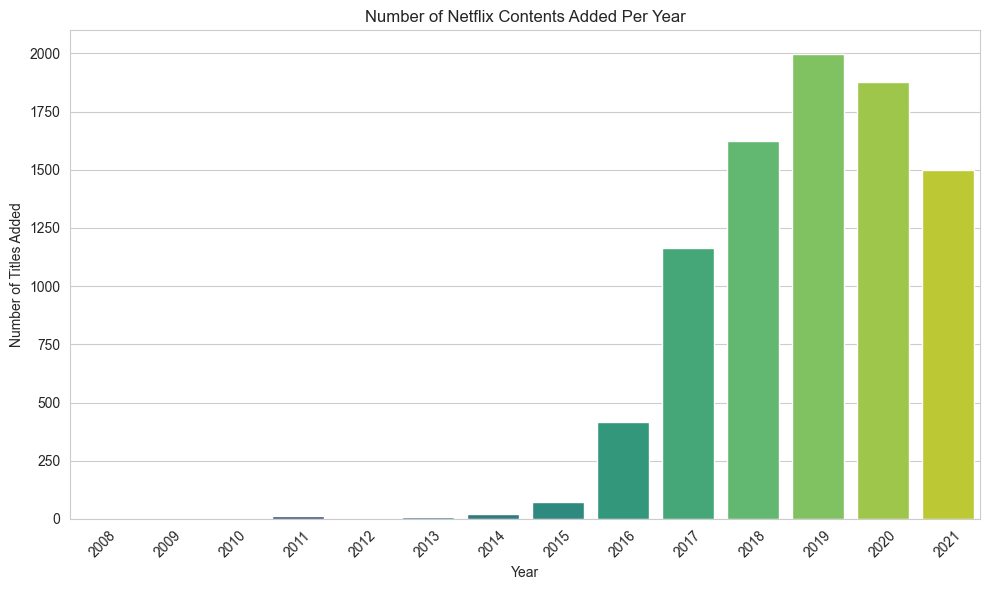

In [61]:
netflix = pd.read_csv('netflix_titles.csv')
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix_dropna = netflix.dropna(subset=['date_added']).copy()
netflix_dropna['year_added'] = netflix_dropna['date_added'].dt.year
year_counts = netflix_dropna['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index.astype(str), y=year_counts.values, palette='viridis')  # convert to str
plt.title('Number of Netflix Contents Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

